# CSC 478: Assignment 1
# Sarah Cummings

In [1]:
#read in the necessary libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd



In [9]:
#read in our data
bank_df=pd.read_csv(r"/Users/sarahcummings/Documents/bank_data.csv",encoding = "ISO-8859-1", low_memory=False)
bank_df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


## Question 1: Examine the data characteristics of the Bank Data file

In [10]:
#for numeric function, we can get a summary as follows:
bank_df.describe()


,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


##### From the table above, we can see descripticve statistics for the numerical variables in the dataset. As you can see, the mean income for the people in the data set is 25,524 dollars a year.

In [11]:
# see how numeric varaibles change by gender
bygender=bank_df.groupby("gender")
bygender.describe()

#note that the females have a higher mean, min, 
#and max income than the males

age    children        income
gender                                            
FEMALE count  300.000000  300.000000    300.000000
       mean    43.693333    1.026667  27831.368233
       std     14.672545    1.078502  13031.258242
       min     18.000000    0.000000   7549.380000
       25%     31.000000    0.000000  17711.100000
       50%     44.000000    1.000000  25448.900000
       75%     57.000000    2.000000  34873.100000
       max     67.000000    3.000000  63130.100000
MALE   count  300.000000  300.000000    300.000000
       mean    41.096667    0.996667  27216.694200
       std     14.077924    1.036131  12780.682144
       min     18.000000    0.000000   5014.210000
       25%     29.000000    0.000000  16805.175000
       50%     40.000000    1.000000  24449.200000
       75%     52.000000    2.000000  36610.850000
       max     67.000000    3.000000  59409.100000

#### Above, we reran the descriptive statistics separated by gender to see how they vary. Next, we will examine the distributions of the categorical varaibles:

In [12]:
# for categorical varaible distributions:
bank_df['gender'].value_counts()

FEMALE    300
MALE      300
Name: gender, dtype: int64

In [13]:
bank_df['region'].value_counts()

INNER_CITY    269
TOWN          173
RURAL          96
SUBURBAN       62
Name: region, dtype: int64

In [14]:
bank_df['married'].value_counts()

YES    396
NO     204
Name: married, dtype: int64

In [15]:
bank_df['car'].value_counts()

NO     304
YES    296
Name: car, dtype: int64

In [16]:
bank_df['savings_acct'].value_counts()

YES    414
NO     186
Name: savings_acct, dtype: int64

In [17]:
bank_df['current_acct'].value_counts()

YES    455
NO     145
Name: current_acct, dtype: int64

In [18]:
bank_df['mortgage'].value_counts()

NO     391
YES    209
Name: mortgage, dtype: int64

In [19]:
bank_df['pep'].value_counts()

NO     326
YES    274
Name: pep, dtype: int64

#### From the categorical frequency tables above, we see that gender is a balanced factor. Most of the observations are people living in the inner  city, and more people are married than are not. Note also that the car varaible is just about balanced, most people have a savings account, and more people have a mortgage than do not. Finally, see that 274 people agreed to buy the PEP, where as 326 did not.   

## Question 2: Examine the difference among those who do and don't buy the PEP.


In [20]:
#group by 
byPEP=bank_df.groupby("pep")
byPEP.describe()


age    children        income
pep                                            
NO  count  326.000000  326.000000    326.000000
    mean    40.098160    1.067485  24900.953374
    std     14.123506    1.195524  11661.123422
    min     18.000000    0.000000   5014.210000
    25%     27.000000    0.000000  15366.475000
    50%     40.000000    0.000000  23105.000000
    75%     51.000000    2.000000  31210.900000
    max     67.000000    3.000000  61554.600000
YES count  274.000000  274.000000    274.000000
    mean    45.127737    0.945255  30644.919453
    std     14.327991    0.860571  13609.613043
    min     18.000000    0.000000   7756.360000
    25%     34.000000    0.000000  19639.475000
    50%     45.000000    1.000000  28080.050000
    75%     58.000000    1.000000  38458.350000
    max     67.000000    3.000000  63130.100000

#### We can see that those who buy the PEP have a higher income on average. They are also older than those who don't buy the PEP, and have a slightly higher children average. Next, we will examine the distribution of the categorical variables for those who do or do not buy the PEP.

In [21]:
byPEP['gender'].value_counts()

pep  gender
NO   FEMALE    170
     MALE      156
YES  MALE      144
     FEMALE    130
Name: gender, dtype: int64

In [22]:
byPEP['married'].value_counts()

pep  married
NO   YES        242
     NO          84
YES  YES        154
     NO         120
Name: married, dtype: int64

In [23]:
byPEP['car'].value_counts()
byPEP['mortgage'].value_counts()

pep  mortgage
NO   NO          209
     YES         117
YES  NO          182
     YES          92
Name: mortgage, dtype: int64

#### From the frequency tables above, we see that more males buy the PEP than females. Those who don't buy PEP are more likely to by married, and a majority of those who buy PEP have a mortgage. 

## Question 3: create a new column that is the z score of Income


In [24]:
bank_df['income_zscore']=(bank_df.income - bank_df.income.mean())/bank_df.income.std(ddof=0)
bank_df.head(5)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_zscore
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.774168
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198706
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.849474
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554643
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.788562


## Question 4: bin the age attribute into three categories

In [25]:
#create bin end points
bins=[18,30,55,67]
#create names for the bins
group_names= ["young","mid-age","old"]

bank_df['age_bins']=pd.cut(bank_df['age'],bins,labels=group_names)
bank_df.head(5)
#show the distribution of the bins
bank_df['age_bins'].value_counts()


mid-age    294
old        150
young      145
Name: age_bins, dtype: int64

## Question 5: min-max normalize all numeric values

In [26]:
bank_df['age_MinMax']=(bank_df.age-bank_df.age.min())/(bank_df.age.max()- bank_df.age.min())
bank_df['income_MinMax']=(bank_df.income-bank_df.income.min())/(bank_df.income.max()- bank_df.income.min())
bank_df['kids_MinMax']=(bank_df.children-bank_df.children.min())/(bank_df.children.max()- bank_df.children.min())


bank_df.head(5)


,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_zscore,age_bins,age_MinMax,income_MinMax,kids_MinMax
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.774168,mid-age,0.612245,0.215634,0.333333
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198706,mid-age,0.448980,0.431395,1.000000
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.849474,mid-age,0.673469,0.198933,0.000000
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554643,young,0.102041,0.264320,1.000000
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.788562,old,0.795918,0.783987,0.000000


## Question 6: convert categorical values into binary dummy values,and save this file as bank_numeric.

In [27]:
#remove ID from data frame since it was interpreted as categorical
bank_subset=bank_df.ix[:,1:17]
#bank_subset

#make dummy variables
bank_numeric= pd.get_dummies(bank_subset)

#add the id column back into the data frame
bank_numeric['id']=bank_df['id']
bank_numeric.head(5)

#write data frame to csv
bank_numeric.to_csv(r"C:\Users\scummings\Desktop\MyFiles\school\bank_numeric.csv")


## Question 7: compute the correlations and form a corr matrix from the file created above.

In [28]:
bank_numeric.corr()

,age,income,children,income_zscore,age_MinMax,income_MinMax,kids_MinMax,gender_FEMALE,gender_MALE,region_INNER_CITY,...,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES,age_bins_young,age_bins_mid-age,age_bins_old
age,1.000000,0.752726,0.023572,0.752726,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,...,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825,-0.705630,0.001820,7.671741e-01
income,0.752726,1.000000,0.036761,1.000000,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,...,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,-0.534254,-0.016635,5.980377e-01
children,0.023572,0.036761,1.000000,0.036761,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,...,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663,0.045384,-0.058194,3.371933e-02
income_zscore,0.752726,1.000000,0.036761,1.000000,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,...,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,-0.534254,-0.016635,5.980377e-01
age_MinMax,1.000000,0.752726,0.023572,0.752726,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,...,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825,-0.705630,0.001820,7.671741e-01
income_MinMax,0.752726,1.000000,0.036761,1.000000,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,...,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,-0.534254,-0.016635,5.980377e-01
kids_MinMax,0.023572,0.036761,1.000000,0.036761,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,...,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663,0.045384,-0.058194,3.371933e-02
gender_FEMALE,0.090081,0.023845,0.014206,0.023845,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,...,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843,-0.035039,-0.060012,1.000740e-01
gender_MALE,-0.090081,-0.023845,-0.014206,-0.023845,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,...,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843,0.035039,0.060012,-1.000740e-01
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.047564,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,...,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054,0.093875,-0.099285,2.128344e-02


## Question 8: Create a scatterplot of income v age: do the varaibles seem correlated?

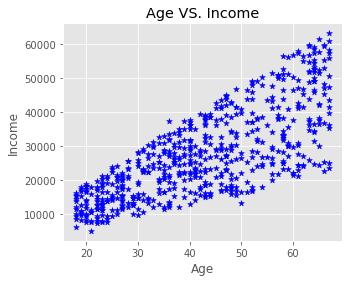

In [30]:

fig = plt.figure(figsize=(5, 4))
plt.style.use('ggplot')

# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(bank_df['age'], bank_df['income'], color="blue", marker="*")
# Add a title.
ax.set_title("Age VS. Income")
# Add some axis labels.
ax.set_xlabel("Age")
ax.set_ylabel("Income")
# Produce an image.
# fig.savefig("scatterplot.png")
plt.show()


#### Yes, it appears as though age and income are positively correlated.

## Question 9: Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).


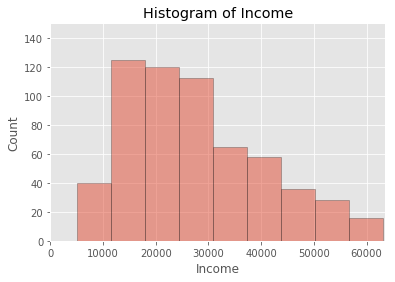

In [31]:
plt.style.use('ggplot')
plt.hist(bank_df['income'], bins=9, alpha=0.5,edgecolor="black")
#plt.hist(bank_df['income'], bins=9, alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income')
plt.axis([0, 63500, 0, 150])
plt.grid(True)
plt.show()




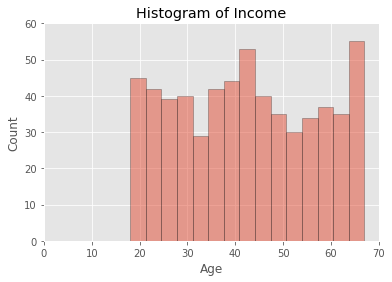

In [33]:
plt.hist(bank_df['age'], bins=15, alpha=0.5,edgecolor="black")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Income')
plt.axis([0, 70, 0, 60])
plt.grid(True)
plt.show()

## Question 10: Using a bargraph, plot the distribution of the values of the region attribute.


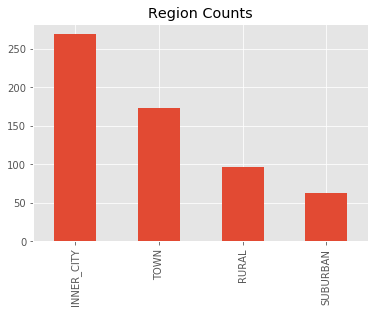

In [34]:
temp2=bank_df["region"].value_counts().plot(kind='bar',title='Region Counts')
temp2


## Question 10: Perform a cross-tabulation of the region attribute with the pep attribute. Then, graph the results.


In [35]:
gg = pd.crosstab(bank_df["region"], bank_df["pep"])
gg


pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


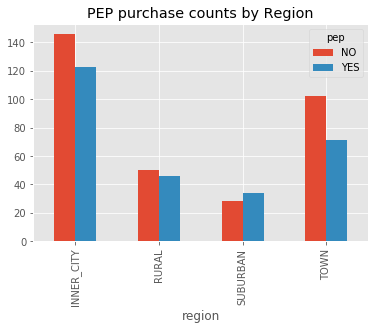

In [36]:
plt.show(gg.plot(kind="bar",title="PEP purchase counts by Region"))